In [27]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

%load_ext autoreload
%autoreload 2

import os
import json
import time
import matplotlib.pyplot as plt
from pprint import pprint

import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import sys
sys.path.append('../')  # path to root of code_base directory - Only if not installed as a package

from code_base.model_suite.inference import DegradationDetector
from code_base.model_suite.utils.preprocessing import load_image

In [3]:
# replace with requried path
seg_saved_weight_path = "../saved_weights/unet_final_2025-04-06_02-50-25.pth"
classification_saved_weight_path = "../saved_weights/cnn_sppf_checkpoint_epoch_45.pth"
output_dir = "../experiment_results/pipeline_output/"

detector_model = DegradationDetector(segmentation_weights_path=seg_saved_weight_path, 
                                     classification_weights_path=classification_saved_weight_path, 
                                     output_dir=output_dir)

In [4]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using DEVICE: {DEVICE}")

Using DEVICE: cuda


In [5]:
img_dir = "/cs6945share/retro_project/bdd100k/images/test/"
test_img_name = "cabc30fc-e7726578.jpg"
test_img_path = os.path.join(img_dir, test_img_name)

In [11]:
tic = time.time()
result_path = detector_model.predict(img_path=test_img_path, device=DEVICE)
toc = time.time()
print(f"Execution time: {round((toc-tic), 4)} sec")

Execution time: 1.6697 sec


Pipeline result saved at: ../experiment_results/pipeline_output/cabc30fc-e7726578


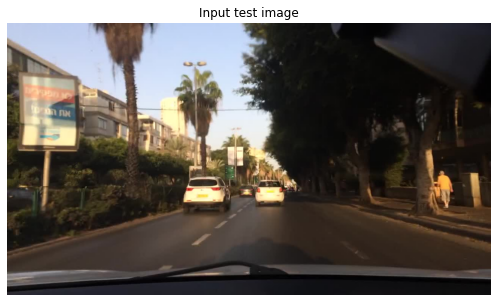

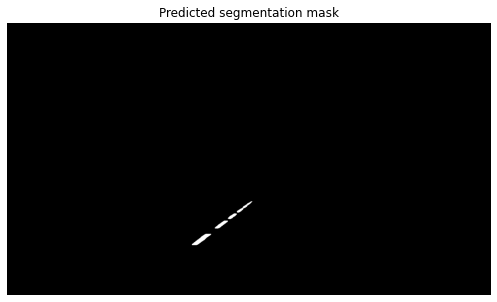

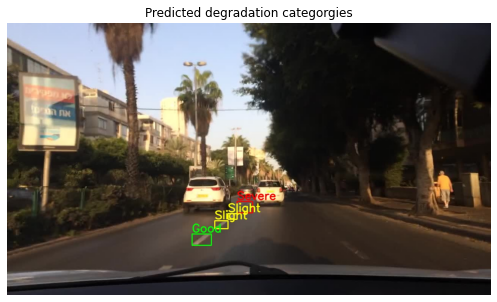

In [29]:
path = result_path['save_path']
print("Pipeline result saved at:", path)
filenames = os.listdir(path)

# plot input image
test_img = load_image(test_img_path)

fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(test_img)
ax.set_title("Input test image")
ax.axis("off")
plt.show()

# plot predicted mask
pred_mask_name = [f for f in filenames if "_pred_mask.png" in f][0]
p = os.path.join(path, pred_mask_name)
pred_mask = load_image(p)

fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(pred_mask)
ax.set_title("Predicted segmentation mask")
ax.axis("off")
plt.show()

# plot annoted results
annot_img_name = [f for f in filenames if "_annotated.jpg" in f][0]
p = os.path.join(path, annot_img_name)
annot_img = load_image(p)

fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(annot_img)
ax.set_title("Predicted degradation categorgies")
ax.axis("off")
plt.show()

In [31]:
annot_file = [f for f in filenames if ".json" in f][0]
p = os.path.join(path, annot_file)
with open(p, 'r') as file:
    annot_data = json.load(file)
    print("Saved annotation file:")
    pprint(annot_data)

Saved annotation file:
{'annotations': [{'bounding_box': [608, 472, 41, 30],
                  'degradation': 2,
                  'id': 'cabc30fc-e7726578_object_1'},
                 {'bounding_box': [584, 504, 24, 15],
                  'degradation': 1,
                  'id': 'cabc30fc-e7726578_object_2'},
                 {'bounding_box': [549, 523, 35, 21],
                  'degradation': 1,
                  'id': 'cabc30fc-e7726578_object_3'},
                 {'bounding_box': [489, 558, 51, 30],
                  'degradation': 0,
                  'id': 'cabc30fc-e7726578_object_4'}],
 'image': 'cabc30fc-e7726578.jpg',
 'predicted_mask': 'cabc30fc-e7726578_pred_mask.png'}
